In [11]:
import pandas as pd

# Importo il db e carico il file excel
file_path = "C:\\Users\\mios9\\Desktop\\Dati telefono.xlsx"
excel_data = pd.ExcelFile(file_path)

#Mostro il nome delle colonne
sheet_names = excel_data.sheet_names
print(sheet_names)

#Carico i dati
df_top_selling = pd.read_excel(file_path, sheet_name='top_selling_mobile_phones')

#Mostro le prime colonne del DB per dare un quadro generale 
print(df_top_selling.head())




['top_selling_mobile_phones']
  Manufacturer                         Model  Form factor Smartphone?  Year  \
0        Nokia                          1100          Bar          No  2003   
1        Nokia                          1110          Bar          No  2005   
2        Apple    iPhone 6 and iPhone 6 Plus  Touchscreen         Yes  2014   
3        Nokia                   105 series,          Bar          No  2013   
4        Apple  iPhone 6S and iPhone 6S Plus  Touchscreen         Yes  2015   

  Graph (million units)  
0          250[4][1][5]  
1        247.5[4][1][6]  
2              222.4[7]  
3                200[8]  
4  174.1[9][10][11][12]  


In [12]:
# Pulizia colonna 'Graph (million units)' tramite estrazione dei dati numerici
df_top_selling['Sales (millions)'] = df_top_selling['Graph (million units)'].str.extract(r'(\d+\.?\d*)').astype(float)

#Raggruppare le vendite per produttore
sales_by_manufacturer = df_top_selling.groupby('Manufacturer')['Sales (millions)'].sum().sort_values(ascending=False)

#Raggruppare per modello
sales_by_model = df_top_selling[['Model', 'Sales (millions)']].sort_values(by='Sales (millions)', ascending=False)

#Migliori produttori per vendite ed i modelli più venduti
sales_by_manufacturer.head(), sales_by_model.head()


(Manufacturer
 Nokia       2376.5
 Apple       1669.3
 Samsung      974.5
 Motorola     323.0
 Huawei       113.8
 Name: Sales (millions), dtype: float64,
                           Model  Sales (millions)
 0                          1100             250.0
 1                          1110             247.5
 2    iPhone 6 and iPhone 6 Plus             222.4
 3                   105 series,             200.0
 4  iPhone 6S and iPhone 6S Plus             174.1)

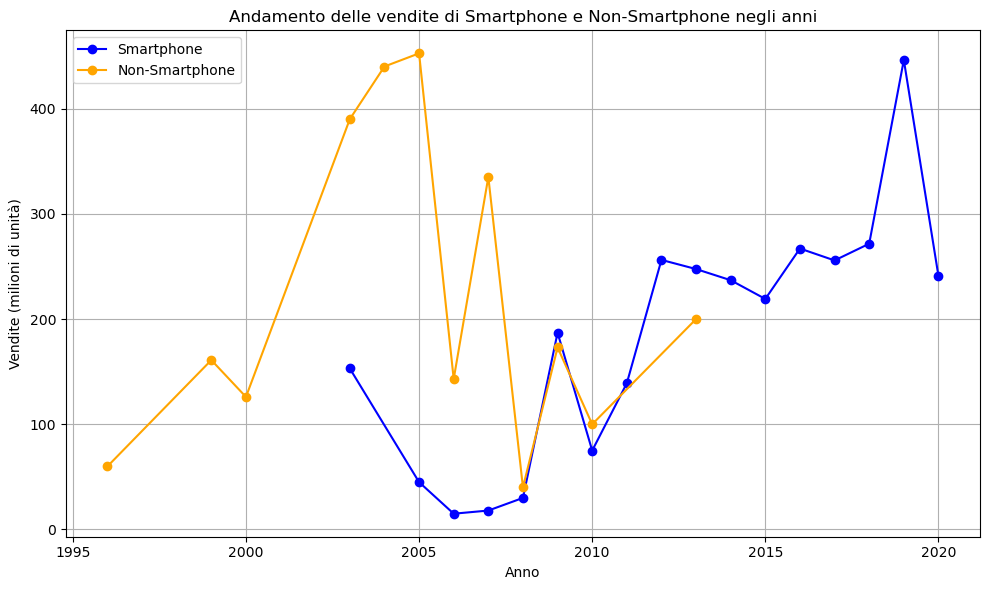

In [33]:
# Pulizia dei dati: estraiamo i numeri dalle colonne delle vendite
df_top_selling['Sales (millions)'] = df_top_selling['Graph (million units)'].str.extract(r'(\d+\.?\d*)').astype(float)

# Escludiamo gli anni 2021 e 2022 (nel db i dati relativi a quei due anni sono incompleti)
df_filtered = df_top_selling[~df_top_selling['Year'].isin([2021, 2022])]

# Suddivisione dei dati in smartphone e non-smartphone
df_smartphone = df_filtered[df_filtered['Smartphone?'] == 'Yes']
df_non_smartphone = df_filtered[df_filtered['Smartphone?'] == 'No']

# Raggruppamento dei dati per anno, sommando le vendite
sales_smartphone_by_year = df_smartphone.groupby('Year')['Sales (millions)'].sum()
sales_non_smartphone_by_year = df_non_smartphone.groupby('Year')['Sales (millions)'].sum()

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(sales_smartphone_by_year.index, sales_smartphone_by_year.values, marker='o', label='Smartphone', color='blue')
plt.plot(sales_non_smartphone_by_year.index, sales_non_smartphone_by_year.values, marker='o', label='Non-Smartphone', color='orange')

# Aggiunta del titolo e delle etichette
plt.title('Andamento delle vendite di Smartphone e Non-Smartphone negli anni')
plt.xlabel('Anno')
plt.ylabel('Vendite (milioni di unità)')
plt.legend()
plt.grid(True)

# Visualizzazione del grafico
plt.tight_layout()
plt.show()

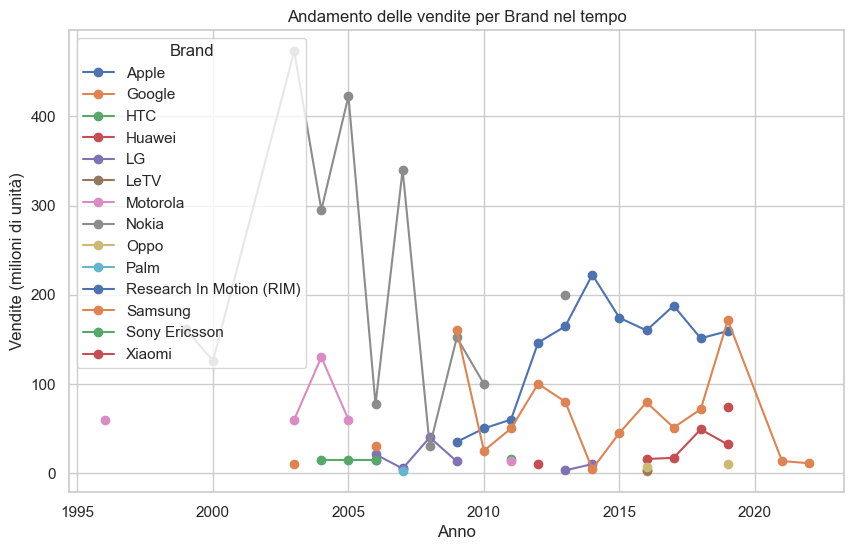

In [10]:
sales_by_brand_year = df_top_selling.groupby(['Year', 'Manufacturer'])['Sales (millions)'].sum().unstack()
sales_by_brand_year.plot(figsize=(10, 6), marker='o')
plt.title('Andamento delle vendite per Brand nel tempo')
plt.xlabel('Anno')
plt.ylabel('Vendite (milioni di unità)')
plt.legend(title='Brand')
plt.grid(True)
plt.show()

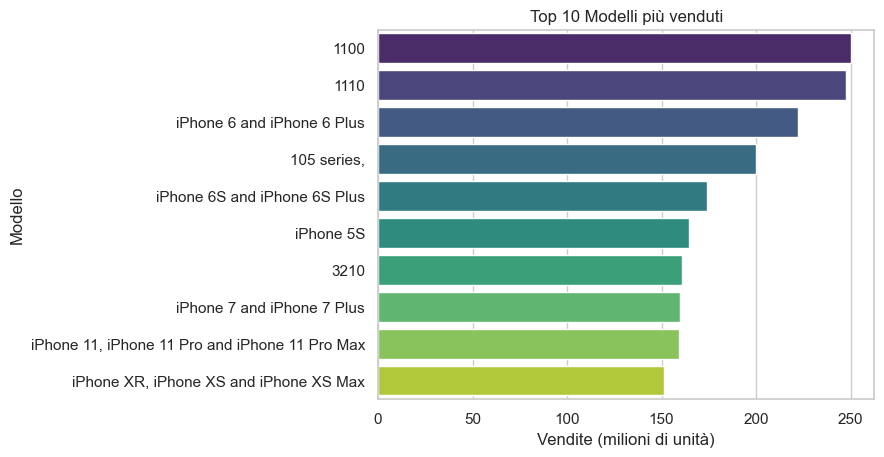

In [12]:
#Modelli più venduti

top_models = df_top_selling[['Model', 'Sales (millions)']].sort_values(by='Sales (millions)', ascending=False).head(10)
sns.barplot(x=top_models['Sales (millions)'], y=top_models['Model'], palette='viridis')
plt.title('Top 10 Modelli più venduti')
plt.xlabel('Vendite (milioni di unità)')
plt.ylabel('Modello')
plt.show()

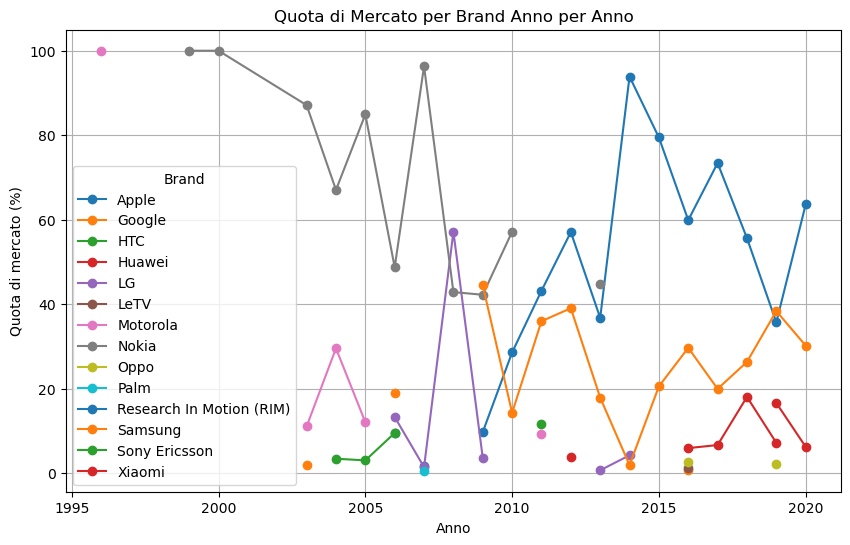

In [41]:
df_filtered = df_top_selling[~df_top_selling['Year'].isin([2021, 2022])]

# Raggruppiamo le vendite per anno e produttore (brand)
sales_by_manufacturer = df_filtered.groupby(['Year', 'Manufacturer'])['Sales (millions)'].sum().unstack()

# Calcolo delle quote di mercato
market_share_by_brand = sales_by_manufacturer.div(sales_by_manufacturer.sum(axis=1), axis=0) * 100

# Creazione del grafico
market_share_by_brand.plot(kind='line', marker='o', figsize=(10, 6))

# Aggiunta del titolo e delle etichette
plt.title('Quota di Mercato per Brand Anno per Anno')
plt.xlabel('Anno')
plt.ylabel('Quota di mercato (%)')
plt.grid(True)
plt.legend(title='Brand')

# Mostra il grafico
plt.show()


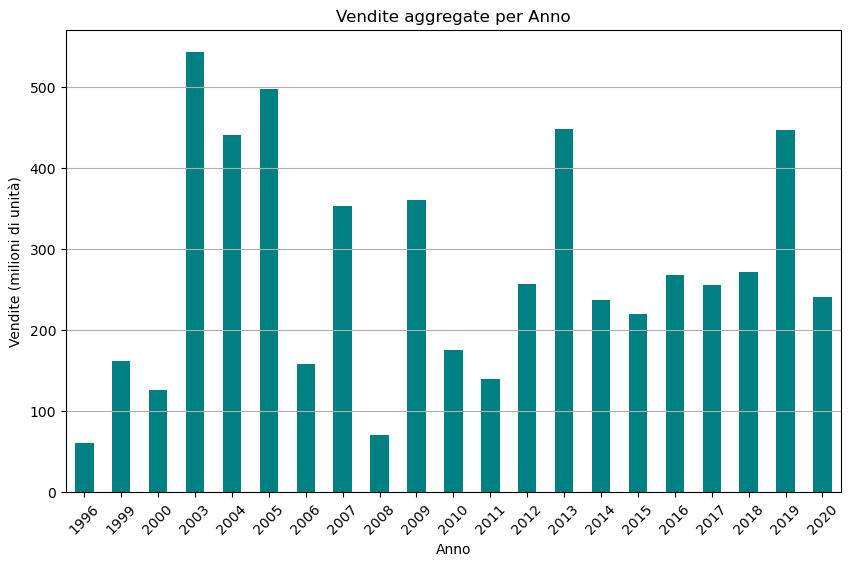

In [30]:
# Assicuriamoci che la colonna 'Sales (millions)' sia numerica e sostituiamo eventuali NaN con 0
df_top_selling['Sales (millions)'] = pd.to_numeric(df_top_selling['Sales (millions)'], errors='coerce').fillna(0)
df_filtered = df_top_selling[~df_top_selling['Year'].isin([2021, 2022])]

# Raggruppiamo le vendite per anno, sommando le vendite
sales_by_year = df_filtered.groupby('Year')['Sales (millions)'].sum()

# Creiamo un grafico a barre per visualizzare le vendite anno per anno
sales_by_year.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Vendite aggregate per Anno')
plt.xlabel('Anno')
plt.ylabel('Vendite (milioni di unità)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

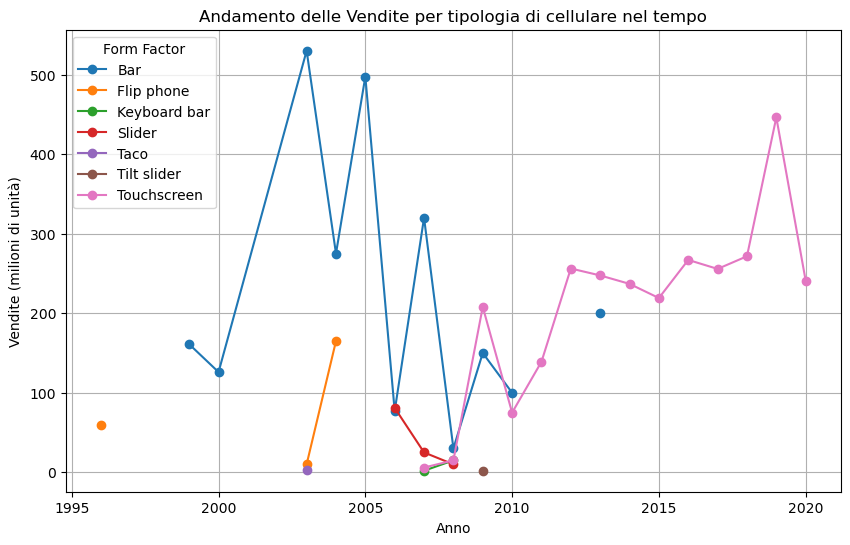

In [27]:
# Assicuriamoci che la colonna 'Sales (millions)' sia numerica e sostituiamo eventuali NaN con 0
df_top_selling['Sales (millions)'] = pd.to_numeric(df_top_selling['Sales (millions)'], errors='coerce').fillna(0)

# Escludiamo gli anni 2021 e 2022
df_filtered = df_top_selling[~df_top_selling['Year'].isin([2021, 2022])]

# Raggruppiamo le vendite per anno e form factor, sommando le vendite per ogni combinazione
sales_by_form_factor_year = df_filtered.groupby(['Year', 'Form factor'])['Sales (millions)'].sum().unstack()

# Creiamo un grafico a linee per visualizzare l'andamento delle vendite per ciascun form factor
sales_by_form_factor_year.plot(kind='line', marker='o', figsize=(10, 6))

# Aggiunta del titolo e delle etichette
plt.title('Andamento delle Vendite per tipologia di cellulare nel tempo')
plt.xlabel('Anno')
plt.ylabel('Vendite (milioni di unità)')
plt.grid(True)
plt.legend(title='Form Factor')

# Mostra il grafico
plt.show()

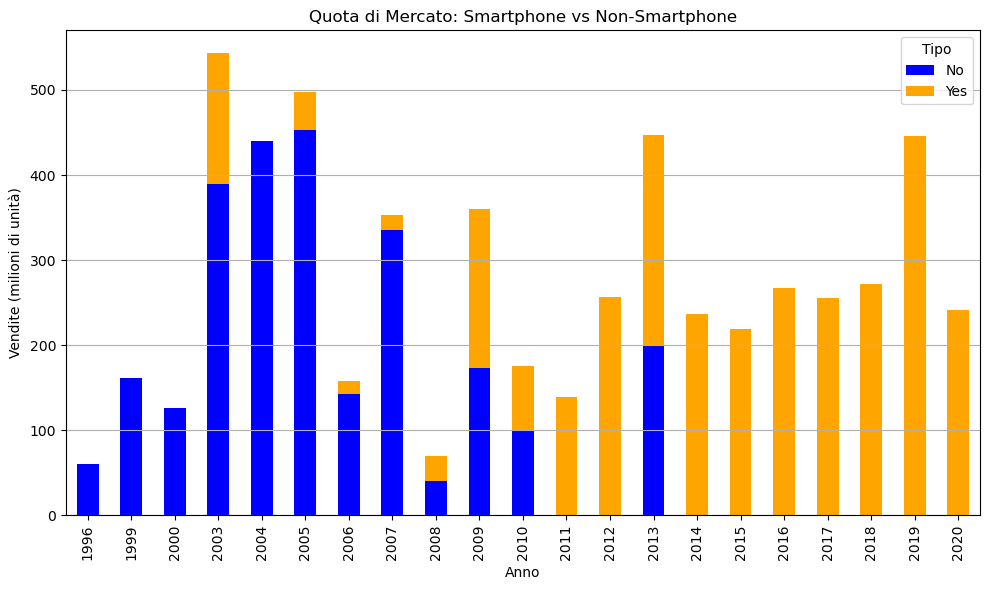

In [38]:
# Raggruppiamo le vendite per anno e tipo (Smartphone vs Non-Smartphone)
sales_smartphone_vs_non_smartphone = df_filtered.groupby(['Year', 'Smartphone?'])['Sales (millions)'].sum().unstack()

# Creiamo un grafico a barre impilate
sales_smartphone_vs_non_smartphone.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'orange'])
plt.title('Quota di Mercato: Smartphone vs Non-Smartphone')
plt.xlabel('Anno')
plt.ylabel('Vendite (milioni di unità)')
plt.legend(title='Tipo')
plt.grid(True, axis='y')

# Mostra il grafico
plt.tight_layout()
plt.show()

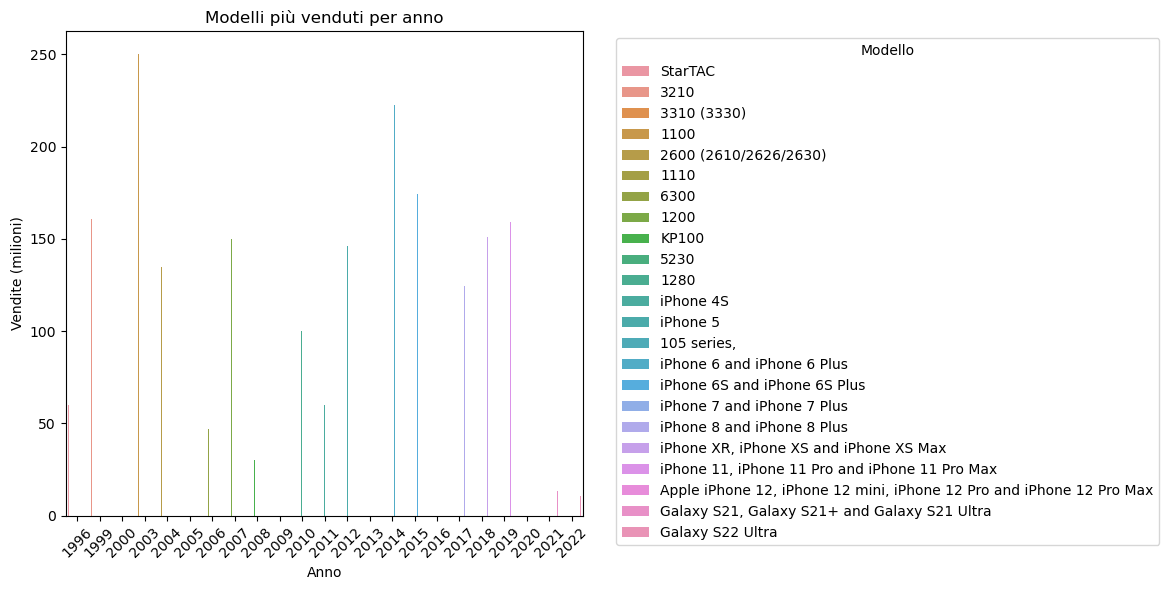

In [40]:
# Gruppo per anno e modello, sommo le vendite e prendo il modello più venduto
top_selling_by_year = (
    df_top_selling.groupby(['Year', 'Model'])['Sales (millions)']
    .sum()
    .reset_index()
)

# Trova il modello più venduto per ogni anno
top_model_per_year = top_selling_by_year.loc[
    top_selling_by_year.groupby('Year')['Sales (millions)'].idxmax()
]

# Creare il grafico
plt.figure(figsize=(12, 6))
sns.barplot(data=top_model_per_year, x='Year', y='Sales (millions)', hue='Model')
plt.title('Modelli più venduti per anno')
plt.xlabel('Anno')
plt.ylabel('Vendite (milioni)')
plt.xticks(rotation=45)
plt.legend(title='Modello', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()